In [11]:
#%pip install wbgapi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wbgapi as wb

In [12]:
# GINI coefficient data 
gini_germany = wb.data.DataFrame('SI.POV.GINI', economy='DEU', time=range(1991, 2020))

gini_germany.columns = gini_germany.columns.str.replace('YR', '')

gini_germany

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
DEU,29.5,29.1,28.6,29.2,28.8,28.0,28.2,28.3,29.0,28.9,...,30.2,30.6,31.1,31.5,30.8,31.7,31.4,31.3,31.9,31.8


In [13]:
#Current Acccount data
ge_ca = wb.data.DataFrame('BN.CAB.XOKA.CD', economy='DEU', time=range(1991, 2020))

ge_ca = ge_ca / 1e9

ge_ca.columns = ge_ca.columns.str.replace('YR', '')

ge_ca.tail(10)


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
DEU,-22.378435,-21.061609,-16.178228,-29.275139,-27.68258,-12.337701,-7.896169,-10.670773,-25.851338,-29.762995,...,200.14757,239.390912,258.786555,256.178763,285.23982,277.320527,314.857604,304.19279,342.181728,311.830319


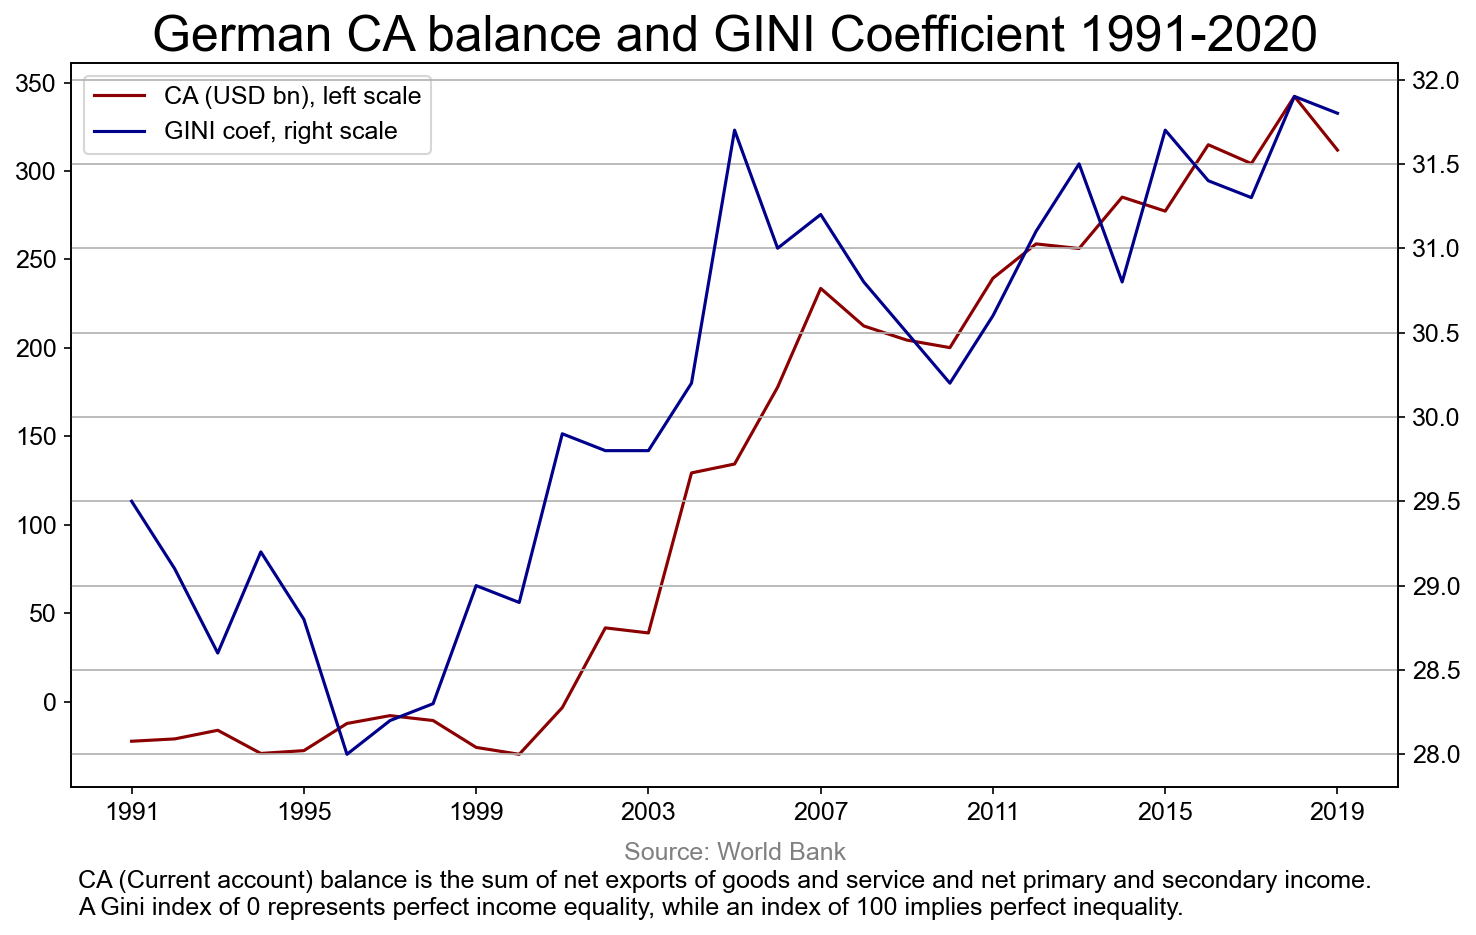

In [14]:
# Plot the trade balance data for Germany
fig, ax1 = plt.subplots(figsize=(10, 6))
 
plt.rc("font", family='Arial')  
plt.rc("font", weight="normal")  
plt.rc("font", size=12) 
plt.rc("axes", titlesize=18) 
plt.rc("axes", labelsize=12) 
plt.rc("xtick", labelsize=12) 
plt.rc("ytick", labelsize=12) 

# Plot trade balance on left y-axis
ax1.plot(ge_ca.columns, ge_ca.loc['DEU'], linestyle='-', label='Trade Balance', color='darkred')
ax1.set_xticks(np.arange(0, len(ge_ca.columns), 4))
ax1.set_xticklabels(ge_ca.columns[::4])
ax1.tick_params(axis='y', labelcolor='black')

# right y-axis for GINI coefficient
ax2 = ax1.twinx()
ax2.plot(gini_germany.columns, gini_germany.loc['DEU'], linestyle='-', label='GINI Coefficient', color='darkblue')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('German CA balance and GINI Coefficient 1991-2020', size=24)

plt.text(0.5, -0.1, 'Source: World Bank', ha='center', va='baseline', transform=ax1.transAxes, fontsize=12, color='gray')

description_ca = "CA (Current account) balance is the sum of net exports of goods and service and net primary and secondary income."
plt.figtext(0.06, -0.000, description_ca, wrap=True, horizontalalignment='left', fontsize=12)

description_gini = ("A Gini index of 0 represents perfect income equality, while an index of 100 implies perfect inequality.")
plt.figtext(0.06, -0.03, description_gini, wrap=True, horizontalalignment='left', fontsize=12)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# separate labels
labels1[0] = 'CA (USD bn), left scale'  # Update ax1 label
labels2[0] = 'GINI coef, right scale'  # Update ax2 label

all_lines = lines1 + lines2
all_labels = labels1 + labels2

ax1.legend(all_lines, all_labels, loc='upper left')

ax1.legend(all_lines, all_labels, loc='upper left')

fig.tight_layout()
plt.grid(True)

fig.set_dpi(150)
plt.show()

In [15]:
#Unemployment & GDP Data -> Make everything in right format

gdp_ger = wb.data.DataFrame('NY.GDP.MKTP.KN', economy='DEU', time=range(1991, 2021))
for x in gdp_ger.columns:
    gdp_ger[x] = gdp_ger[x] / 1e12
gdp_ger.columns = gdp_ger.columns.str.replace('YR', '')

unem_ger = wb.data.DataFrame('SL.UEM.TOTL.ZS', economy='DEU', time=range(1991, 2021))

unem_ger.columns = unem_ger.columns.str.replace('YR', '')

gdp_ger.columns = gdp_ger.columns.astype(int)
unem_ger.columns = unem_ger.columns.astype(int)

gdp_ger_t = gdp_ger.T
unem_ger_t = unem_ger.T

gdp_ger_t.index.name = 'year'
unem_ger_t.index.name = 'year'

merged_df = pd.merge(gdp_ger_t, unem_ger_t, left_index=True, right_index=True, suffixes=('_gdp', '_unem'))

merged_df.head()

economy,DEU_gdp,DEU_unem
year,,
1991,2.238509,5.316
1992,2.283597,6.323
1993,2.261371,7.675
1994,2.320112,8.727
1995,2.355039,8.158


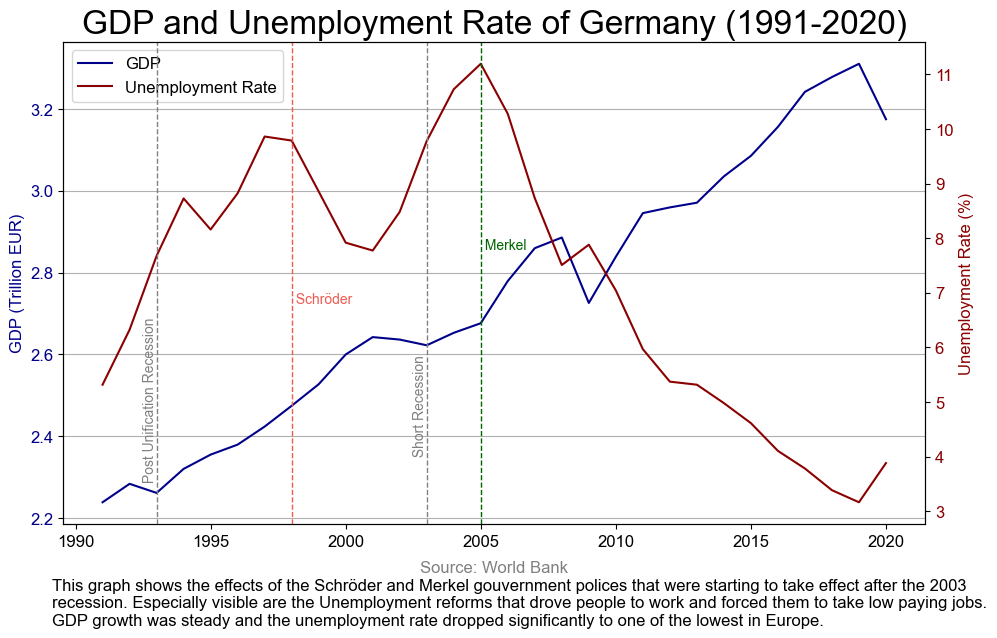

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# GDP on the left y-axis
ax1.plot(gdp_ger.columns, gdp_ger.loc['DEU'], linestyle='-', color='darkblue', label='GDP')
ax1.set_ylabel('GDP (Trillion EUR)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# right y-axis for the unemployment rate
ax2 = ax1.twinx()
ax2.plot(unem_ger.columns, unem_ger.loc['DEU'], linestyle='-', color='darkred', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')


# Add title and grid
plt.title('GDP and Unemployment Rate of Germany (1991-2020)', fontsize=24)
ax1.grid(axis='y')

#Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

#Plot recession periods
plt.axvline(x=1993, color='grey', linestyle='--', linewidth=1)
plt.text(1993, gdp_ger.loc['DEU', 1993] + 1.2, ' Post Unification Recession', rotation=90, verticalalignment='bottom', color='grey', size=10, ha='right')

plt.axvline(x=2003, color='grey', linestyle='--', linewidth=1)
plt.text(2003, gdp_ger.loc['DEU', 2003] + 1.3, ' Short Recession', rotation=90, verticalalignment='bottom', color='grey', size=10, ha='right')


plt.axvline(x=2005, color='darkgreen', linestyle='--', linewidth=1)
plt.text(2005, gdp_ger.loc['DEU', 2005] + 5.2, ' Merkel', rotation=0, verticalalignment='center', color='darkgreen', size=10)

plt.axvline(x=1998, color='#ed5b51', linestyle='--', linewidth=1)
plt.text(1998, gdp_ger.loc['DEU', 2005] + 4.2, ' Schröder', rotation=0, verticalalignment='center', color='#ed5b51', size=10)

description = "This graph shows the effects of the Schröder and Merkel gouvernment polices that were starting to take effect after the 2003 recession. Especially visible are the Unemployment reforms that drove people to work and forced them to take low paying jobs. GDP growth was steady and the unemployment rate dropped significantly to one of the lowest in Europe."
plt.figtext(0.06, -0.052, description, wrap=True, horizontalalignment='left', fontsize=12)

# Add Source
plt.text(0.5, -0.1, 'Source: World Bank', ha='center', va='baseline', transform=plt.gca().transAxes, fontsize=12, color='gray')



plt.tight_layout()
plt.show()